In [8]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
prices = pd.read_csv("data\\commSetTokensprices_Jan2025.csv")

prices['Date'] = pd.to_datetime(prices['Date']).dt.date
prices.set_index('Date', inplace = True, drop = False)
coin = 'Ethereum prices'


In [36]:
prices[coin]

Date
2018-10-21     206.882099
2018-10-22     206.309827
2018-10-23     205.037755
2018-10-24     204.083946
2018-10-25     203.522199
                 ...     
2025-01-08    3380.021126
2025-01-09    3325.130029
2025-01-10    3219.092845
2025-01-11    3269.175995
2025-01-12    3283.591323
Name: Ethereum prices, Length: 2276, dtype: float64

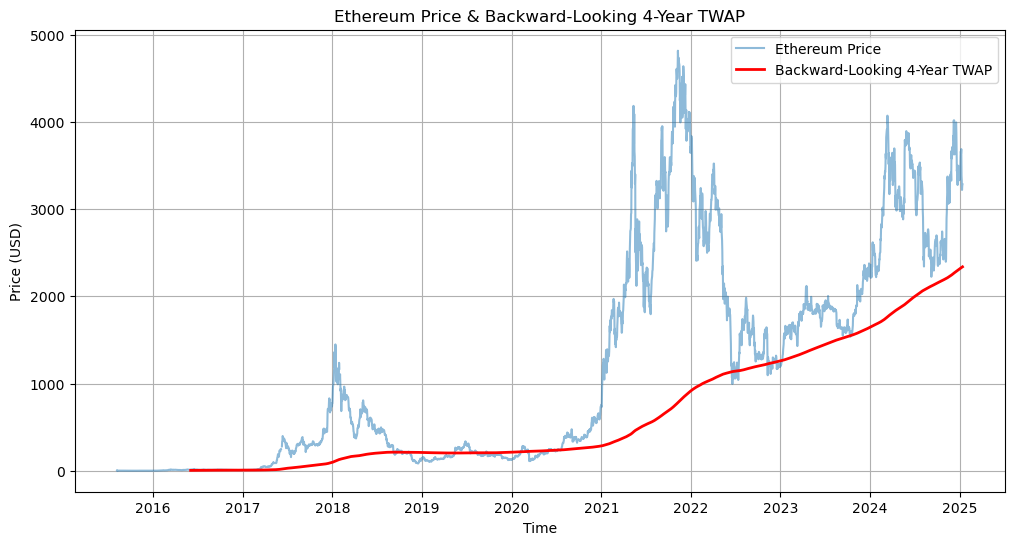

In [39]:

# Sort data by time (if not already sorted)
prices = prices.sort_index()

# Compute **backward-looking** 4-year TWAP (using a 4-year rolling window)
# Assuming daily data: 4 years ≈ 4 * 365 days
prices["TWAP_4Y"] = prices[coin].rolling(window=1533, min_periods=300).mean()

# Plot Ethereum Price and Backward-Looking 4-Year TWAP
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices[coin], label="Ethereum Price", alpha=0.5)
plt.plot(prices.index, prices["TWAP_4Y"], label="Backward-Looking 4-Year TWAP", color="red", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.title("Ethereum Price & Backward-Looking 4-Year TWAP")
plt.legend()
plt.grid()
plt.show()


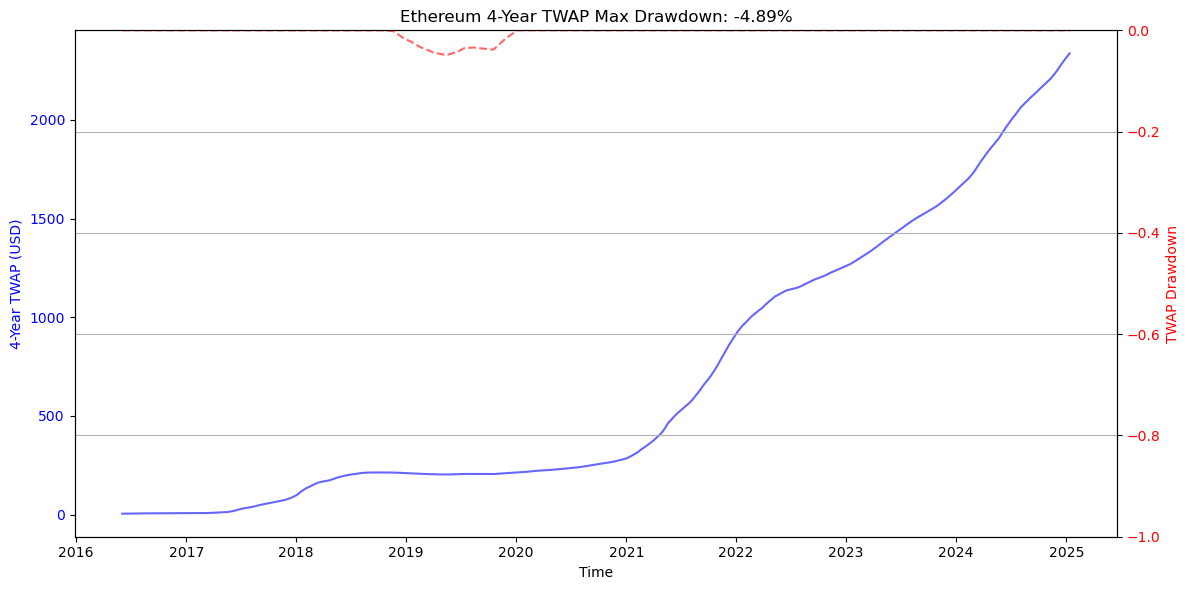

In [42]:
# Compute cumulative max of TWAP (historical peak TWAP)
prices["TWAP_Cumulative_Max"] = prices["TWAP_4Y"].cummax()

# Compute Drawdown on TWAP = (Current TWAP - Peak TWAP) / Peak TWAP
prices["TWAP_Drawdown"] = (prices["TWAP_4Y"] - prices["TWAP_Cumulative_Max"]) / prices["TWAP_Cumulative_Max"]

# Compute **Max Drawdown** (minimum TWAP drawdown value)
twap_max_drawdown = prices["TWAP_Drawdown"].min()

# Plot TWAP & TWAP Drawdown
fig, ax1 = plt.subplots(figsize=(12, 6))

# TWAP plot (Primary y-axis)
ax1.set_xlabel("Time")
ax1.set_ylabel("4-Year TWAP (USD)", color="blue")
ax1.plot(prices.index, prices["TWAP_4Y"], label="4-Year TWAP", color="blue", alpha=0.6)
ax1.tick_params(axis="y", labelcolor="blue")

# Drawdown plot (Secondary y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel("TWAP Drawdown", color="red")
ax2.plot(prices.index, prices["TWAP_Drawdown"], label="TWAP Drawdown", color="red", linestyle="dashed", alpha=0.6)
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(-1, 0)  # Force drawdown axis to be between -100% and 0%

# Title & Grid
plt.title(f"Ethereum 4-Year TWAP Max Drawdown: {twap_max_drawdown:.2%}")
fig.tight_layout()
plt.grid()
plt.show()

# Print TWAP max drawdown value
